# 🧠 Understanding SIFT (Scale-Invariant Feature Transform)

SIFT is an advanced algorithm introduced by **David Lowe (2004)** to detect and describe local features in images.  
Unlike earlier methods like **Harris corner detection** (which is *not scale-invariant*), **SIFT is both scale and rotation invariant**.

---

## 🎯 Goals of This Chapter

- Understand the concepts behind the **SIFT algorithm**
- Learn how to **detect SIFT keypoints** and **compute SIFT descriptors** using OpenCV

---

## 🧪 Why SIFT?

- Harris detector works well with **rotations** but **fails under scaling**.
- SIFT solves this problem using a **multi-scale approach**, making it suitable for:
  - Object recognition  
  - Image stitching  
  - 3D reconstruction  
  - And more

---

## 🔍 Steps in the SIFT Algorithm

### 1. **Scale-space Extrema Detection**
- SIFT uses **scale-space filtering** to detect keypoints at different scales.
- Instead of Laplacian of Gaussian (LoG), which is computationally expensive, SIFT uses **Difference of Gaussians (DoG)** as an approximation.
- The image is blurred with Gaussian filters at different scales (𝜎), and the **difference between successive blurred images** gives the DoG.
- Keypoints are detected as **local extrema** in a 3D scale-space by comparing each pixel with:
  - 8 neighbors in the current scale
  - 9 neighbors in the scale above
  - 9 neighbors in the scale below

📌 **Recommended parameters from the paper**:
- Number of octaves: **4**
- Scale levels per octave: **5**

---

### 2. **Keypoint Localization**
- Potential keypoints are refined using **Taylor series expansion** to find their accurate location.
- Keypoints with low contrast are rejected using a threshold (≈ **0.03**, `contrastThreshold` in OpenCV).
- To remove edge responses, the **Hessian matrix** is used to compute curvature.
  - If the **curvature ratio** is too high (threshold ≈ **10**, `edgeThreshold`), the keypoint is discarded.

---

### 3. **Orientation Assignment**
- For each keypoint, one or more **orientations** are assigned based on local gradient directions.
- A **36-bin histogram** (covering 360°) is created from the gradients.
- Any peak ≥ 80% of the highest peak is used → multiple orientations may be assigned, improving stability.

---

### 4. **Keypoint Descriptor Generation**
- Around each keypoint:
  - A **16×16** window is selected
  - Divided into **4×4 subregions**
  - Each subregion creates an **8-bin orientation histogram**
- This results in a **128-dimensional descriptor vector**.
- The descriptor is normalized and adjusted for robustness against:
  - Illumination changes
  - Small geometric distortions

---

### 5. **Keypoint Matching**
- Keypoints between images are matched using **nearest neighbor search** on their descriptors.
- To reduce false matches, the **ratio test** is applied:
    - If (distance to best match) / (distance to second-best) > 0.8 → Reject match
    - This removes about **90% false matches** while preserving most correct ones.

---

## 🛠️ Using SIFT in OpenCV

- SIFT was **previously patented**, but became **open-source in 2020**.
- Now available directly in OpenCV main package (`cv.SIFT_create()`)

## Detect Keypoints and Draw Them

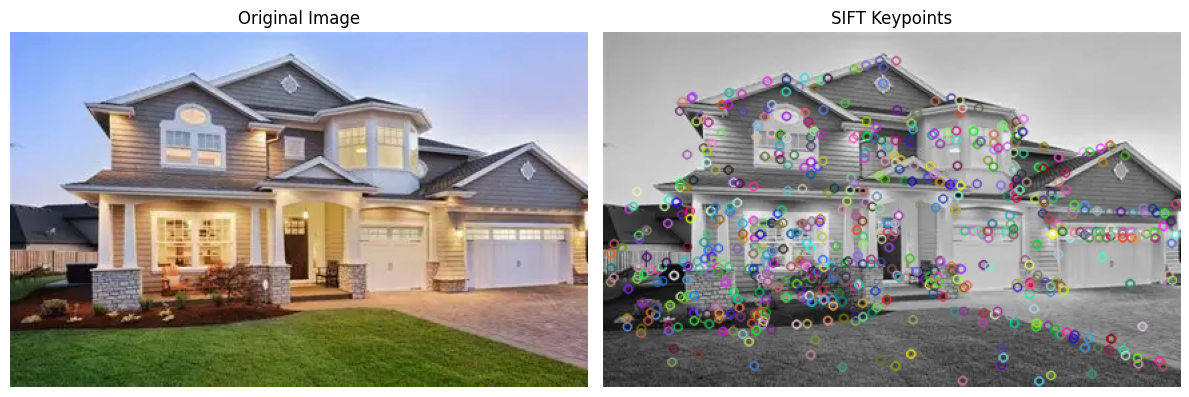

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img = cv.imread(r'/content/drive/MyDrive/FPT Material + Study/Sem 4/CPV301/Source for PE/Feature Detection and Description/Image/home.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect keypoints
keypoints = sift.detect(gray, None)

# Make a copy of the original image before drawing
img_kp = img.copy()
img_kp = cv.drawKeypoints(gray, keypoints, img_kp)

# Convert BGR (OpenCV default) to RGB for Matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_kp_rgb = cv.cvtColor(img_kp, cv.COLOR_BGR2RGB)

# Plot using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('SIFT Keypoints')
plt.imshow(img_kp_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


## Draw Rich Keypoints (show size & orientation)

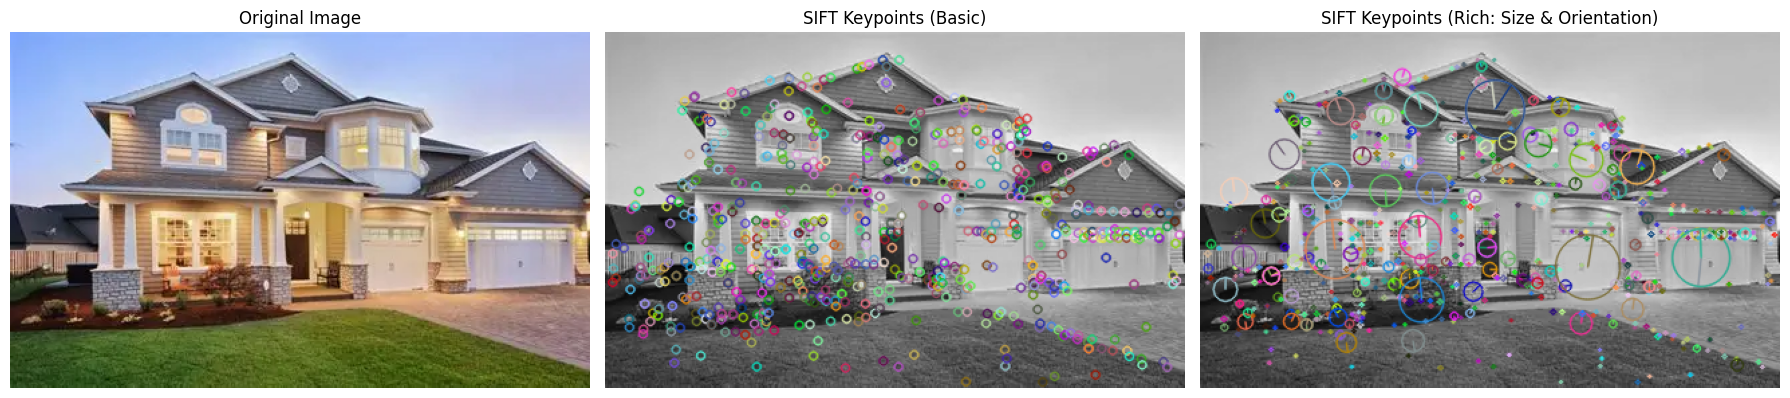

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img = cv.imread(r'/content/drive/MyDrive/FPT Material + Study/Sem 4/CPV301/Source for PE/Feature Detection and Description/Image/home.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect keypoints
keypoints = sift.detect(gray, None)

# Draw basic keypoints (just points)
img_kp_basic = img.copy()
img_kp_basic = cv.drawKeypoints(gray, keypoints, img_kp_basic)

# Draw rich keypoints (with size and orientation)
img_kp_rich = img.copy()
img_kp_rich = cv.drawKeypoints(
    gray, keypoints, img_kp_rich,
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Convert BGR to RGB for matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_kp_basic_rgb = cv.cvtColor(img_kp_basic, cv.COLOR_BGR2RGB)
img_kp_rich_rgb = cv.cvtColor(img_kp_rich, cv.COLOR_BGR2RGB)

# Plot all three images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('SIFT Keypoints (Basic)')
plt.imshow(img_kp_basic_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SIFT Keypoints (Rich: Size & Orientation)')
plt.imshow(img_kp_rich_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


## Compute Descriptors

There are two ways to compute descriptors:

**Option 1: Separate Detection and Description**



In [6]:
import cv2 as cv

# Read image and convert to grayscale
img = cv.imread(r'/content/drive/MyDrive/FPT Material + Study/Sem 4/CPV301/Source for PE/Feature Detection and Description/Image/home.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SIFT object and detect keypoints
sift = cv.SIFT_create()
keypoints = sift.detect(gray, None)

# Compute descriptors
keypoints, descriptors = sift.compute(gray, keypoints)

# Print some details
print(f"Number of keypoints: {len(keypoints)}")
print(f"Descriptors shape: {descriptors.shape}")
print(f"First descriptor:\n{descriptors[0]}")


Number of keypoints: 672
Descriptors shape: (672, 128)
First descriptor:
[ 35.  62.   3.   2.  96.  73.   0.   0.  89.  77.  13.   2.   1.   0.
  11.  24.   6.   1.   7.   4.   4.  14.  56.  32.   0.   0.   0.   1.
  39.  48.  13.   0.  39.  20.   1.   4. 146. 145.   4.   6. 146.  52.
   2.   1.  11.  10.  12.  89.  33.   5.   3.  20.  53.  29.  38.  48.
   0.   0.   0.  14. 102.  20.   2.   0.  23.   2.   0.  14. 146.  60.
   3.   5. 146. 122.  26.   5.  20.  17.   4.  21.  24.  49.  77. 102.
  26.   4.   4.   5.   0.   2.  15.  43.  30.   8.   3.   0.   1.   1.
   1.  80. 146.  15.   1.   1.  30.  63.  11.   7.   8.   5.   2.   3.
  35.  36.  20.   7.   0.   2.   4.   6.   3.   1.   2.   3.   6.  17.
   8.   2.]


**Option 2: Detect and Compute Together**

In [7]:
import cv2 as cv

# Load image and convert to grayscale
img = cv.imread(r'/content/drive/MyDrive/FPT Material + Study/Sem 4/CPV301/Source for PE/Feature Detection and Description/Image/home.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SIFT object and run detectAndCompute
sift = cv.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Print information
print(f"Number of keypoints: {len(keypoints)}")
print(f"Descriptors shape: {descriptors.shape}")
print(f"First descriptor (length {len(descriptors[0])}):\n{descriptors[0]}")


Number of keypoints: 672
Descriptors shape: (672, 128)
First descriptor (length 128):
[ 35.  62.   3.   2.  96.  73.   0.   0.  89.  77.  13.   2.   1.   0.
  11.  24.   6.   1.   7.   4.   4.  14.  56.  32.   0.   0.   0.   1.
  39.  48.  13.   0.  39.  20.   1.   4. 146. 145.   4.   6. 146.  52.
   2.   1.  11.  10.  12.  89.  33.   5.   3.  20.  53.  29.  38.  48.
   0.   0.   0.  14. 102.  20.   2.   0.  23.   2.   0.  14. 146.  60.
   3.   5. 146. 122.  26.   5.  20.  17.   4.  21.  24.  49.  77. 102.
  26.   4.   4.   5.   0.   2.  15.  43.  30.   8.   3.   0.   1.   1.
   1.  80. 146.  15.   1.   1.  30.  63.  11.   7.   8.   5.   2.   3.
  35.  36.  20.   7.   0.   2.   4.   6.   3.   1.   2.   3.   6.  17.
   8.   2.]


### 📌 Outputs of `sift.detectAndCompute()`

- **keypoints**: List of `cv2.KeyPoint` objects  
  → Each object contains information such as:
  - `(x, y)` coordinates
  - scale (size)
  - orientation (angle)
  - response (strength)
  - octave & layer

- **descriptors**: NumPy array of shape `(number of keypoints, 128)`  
  → Each row is a 128-dimensional vector representing one keypoint

---

### 📚 Summary of SIFT Pipeline

| **Step**                 | **Purpose**                                                   |
|--------------------------|---------------------------------------------------------------|
| Scale-space Extrema      | Detect keypoints at multiple scales                           |
| Keypoint Localization    | Refine keypoint position & remove unstable/low-contrast points |
| Orientation Assignment   | Ensure rotation invariance                                     |
| Descriptor Extraction    | Describe local image patches using 128-dim vectors             |
| Keypoint Matching        | Match descriptors between images with robust criteria          |
